# DWH Project 
## Ahmed Mohamed Mohamd

# 1- Reading Data from Multiple Source 

In [1]:
import pyodbc
import pandas as pd

# Connection 
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=DESKTOP-LKBILJA;'  
    'DATABASE=OlympicsDB;'
    'Trusted_Connection=yes;'
)

# Test connection
cursor = conn.cursor()
cursor.execute("SELECT TOP 5 * FROM athlete_events")
for row in cursor.fetchall():
    print(row)

(1, 'A Dijiang', 'M', 24.0, 180.0, 80.0, 'China', 'CHN', '1992 Summer', 1992, 'Summer', 'Barcelona', 'Basketball', "Basketball Men's Basketball", None)
(2, 'A Lamusi', 'M', 23.0, 170.0, 60.0, 'China', 'CHN', '2012 Summer', 2012, 'Summer', 'London', 'Judo', "Judo Men's Extra-Lightweight", None)
(3, 'Gunnar Nielsen Aaby', 'M', 24.0, None, None, 'Denmark', 'DEN', '1920 Summer', 1920, 'Summer', 'Antwerpen', 'Football', "Football Men's Football", None)
(4, 'Edgar Lindenau Aabye', 'M', 34.0, None, None, 'Denmark/Sweden', 'DEN', '1900 Summer', 1900, 'Summer', 'Paris', 'Tug-Of-War', "Tug-Of-War Men's Tug-Of-War", 'Gold')
(5, 'Christine Jacoba Aaftink', 'F', 21.0, 185.0, 82.0, 'Netherlands', 'NED', '1988 Winter', 1988, 'Winter', 'Calgary', 'Speed Skating', "Speed Skating Women's 500 metres", None)


In [2]:
# Readin data from database 
df_athletes = pd.read_sql("SELECT * FROM athlete_events", conn)
df_athletes


C:\Users\Ahmed\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,None
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,None
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",None
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",None


In [3]:
#Reading Data from CSV File (noc_region.csv)
df_noc = pd.read_csv('noc_region.csv')
df_noc

,noc_region,reg,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [4]:
# Merge 2 files in 1 file 
df_merged = pd.merge(df_athletes, df_noc, how='left', left_on='NOC', right_on='noc_region')
df_merged

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,noc_region,reg,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,CHN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,CHN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,DEN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,DEN,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,NED,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,None,GBR,UK,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,None,GBR,UK,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",None,AUS,Australia,NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",None,AUS,Australia,NaN


In [7]:
df_merged.rename(columns={'ID' : 'Participation_ID'}, inplace=True)


# 2-Preprocessing Of Data And Cleaning

In [8]:
print(list(df_merged.columns))

['Participation_ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'noc_region', 'reg', 'notes']


## 1- Info and describe

In [9]:
print("The Shape of Data : ",df_merged.shape)
print("\nData types and non-null counts:\n")
print(df_merged.info())
print("\nNumeric summary:\n")
display(df_merged.describe())

The Shape of Data :  (70000, 18)

Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Participation_ID  70000 non-null  int64  
 1   Name              70000 non-null  object 
 2   Sex               70000 non-null  object 
 3   Age               67268 non-null  float64
 4   Height            53746 non-null  float64
 5   Weight            52899 non-null  float64
 6   Team              70000 non-null  object 
 7   NOC               70000 non-null  object 
 8   Games             70000 non-null  object 
 9   Year              70000 non-null  int64  
 10  Season            70000 non-null  object 
 11  City              70000 non-null  object 
 12  Sport             70000 non-null  object 
 13  Event             70000 non-null  object 
 14  Medal             9690 non-null   object 
 15  noc_region        69

,Participation_ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


## 2- Missing Values

In [10]:
# Check Nulls
print("Missing values per column:")
print(df_merged.isna().sum())

Missing values per column:
Participation_ID        0
Name                    0
Sex                     0
Age                  2732
Height              16254
Weight              17101
Team                    0
NOC                     0
Games                   0
Year                    0
Season                  0
City                    0
Sport                   0
Event                   0
Medal               60310
noc_region             55
reg                    63
notes               68756
dtype: int64


In [11]:
# Age, Height, Weight
df_merged['Age'].fillna(df_merged['Age'].median(), inplace=True)
df_merged['Height'].fillna(df_merged['Height'].median(), inplace=True)
df_merged['Weight'].fillna(df_merged['Weight'].median(), inplace=True)

In [12]:
# Medal
df_merged['Medal'].fillna('No Medal', inplace=True)

In [13]:
# noc_region , reg
df_merged['noc_region'].fillna('Unknown', inplace=True)
df_merged['reg'].fillna('Unknown', inplace=True)

In [14]:
# notes
df_merged.drop(columns=['notes'], inplace=True)


In [15]:
# Check Nulls
print("After handle Nulls \nMissing values per column:")
print(df_merged.isna().sum())

After handle Nulls 
Missing values per column:
Participation_ID    0
Name                0
Sex                 0
Age                 0
Height              0
Weight              0
Team                0
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
noc_region          0
reg                 0
dtype: int64


## 3  Check duplicates

In [16]:
print("Duplicate rows:", df_merged.duplicated().sum())

Duplicate rows: 383


In [17]:
# Show duplicate rows
duplicate_rows = df_merged[df_merged.duplicated()]
duplicate_rows

,Participation_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,noc_region,reg
1252,704,Dsir Antoine Acket,M,27.0,175.0,70.0,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal,BEL,Belgium
4282,2449,William Truman Aldrich,M,48.0,175.0,70.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",No Medal,USA,USA
4283,2449,William Truman Aldrich,M,48.0,175.0,70.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",No Medal,USA,USA
4862,2777,Hermann Reinhard Alker,M,43.0,175.0,70.0,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",No Medal,GER,Germany
4864,2777,Hermann Reinhard Alker,M,43.0,175.0,70.0,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",No Medal,GER,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67774,34642,Clara Beatrice Fenton,F,45.0,175.0,70.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",No Medal,USA,USA
69050,35215,Pedro Figari Solari,M,71.0,175.0,70.0,Uruguay,URU,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Unknown Event,No Medal,URU,Uruguay
69051,35215,Pedro Figari Solari,M,71.0,175.0,70.0,Uruguay,URU,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Unknown Event,No Medal,URU,Uruguay
69052,35215,Pedro Figari Solari,M,71.0,175.0,70.0,Uruguay,URU,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Unknown Event,No Medal,URU,Uruguay


In [18]:
# Remove duplicate rows
df_merged.drop_duplicates(inplace=True)

In [19]:
print("Duplicate rows:", df_merged.duplicated().sum())

Duplicate rows: 0


## 4 Check data types

In [20]:
# Check current data types
print(df_merged.dtypes)

Participation_ID      int64
Name                 object
Sex                  object
Age                 float64
Height              float64
Weight              float64
Team                 object
NOC                  object
Games                object
Year                  int64
Season               object
City                 object
Sport                object
Event                object
Medal                object
noc_region           object
reg                  object
dtype: object


In [21]:
cols_to_category = ['Sex', 'Medal', 'Season', 'noc_region', 'reg']
for col in cols_to_category:
    df_merged[col] = df_merged[col].astype('category')

In [22]:
print(df_merged.dtypes)

Participation_ID       int64
Name                  object
Sex                 category
Age                  float64
Height               float64
Weight               float64
Team                  object
NOC                   object
Games                 object
Year                   int64
Season              category
City                  object
Sport                 object
Event                 object
Medal               category
noc_region          category
reg                 category
dtype: object


## 5  Text Normalization

In [23]:
# Name normalization
df_merged['Name'] = df_merged['Name'].str.strip().str.title()

# Team and NOC
df_merged['Team'] = df_merged['Team'].str.strip().str.upper()
df_merged['NOC'] = df_merged['NOC'].str.strip().str.upper()

# City, Sport, Event, Medal
for col in ['City', 'Sport', 'Event', 'Medal']:
    df_merged[col] = df_merged[col].str.strip().str.title()


In [24]:
df_merged

,Participation_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,noc_region,reg
0,1,A Dijiang,M,24.0,180.0,80.0,CHINA,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men'S Basketball,No Medal,CHN,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHINA,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men'S Extra-Lightweight,No Medal,CHN,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,DENMARK,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men'S Football,No Medal,DEN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,DENMARK/SWEDEN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men'S Tug-Of-War,Gold,DEN,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NETHERLANDS,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women'S 500 Metres,No Medal,NED,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,175.0,70.0,GREAT BRITAIN,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men'S Giant Slalom,No Medal,GBR,UK
69996,35656,Stuart Fitzsimmons,M,19.0,175.0,70.0,GREAT BRITAIN,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men'S Slalom,No Medal,GBR,UK
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,AUSTRALIA,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men'S 10,000 Metres",No Medal,AUS,Australia
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,AUSTRALIA,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men'S 5,000 Metres",No Medal,AUS,Australia


In [25]:
print("Duplicate rows:", df_merged.duplicated().sum())

Duplicate rows: 0


In [26]:
df_merged.columns

Index(['Participation_ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal',
       'noc_region', 'reg'],
      dtype='object')

# 3- Feature Engineering 

###  1- add "Age_Group"
The Age_Group column categorizes athletes into age ranges, making it easier to analyze performance patterns and trends across different stages of their athletic careers.

In [27]:
# Age groups
bins = [0, 19, 25, 30, 100] 
labels = ['<20', '20-25', '26-30', '30+']
df_merged['Age_Group'] = pd.cut(df_merged['Age'], bins=bins, labels=labels)

### 2- " Participation_Number"
Indicates the order of each athlete's Olympic participation based on the year, where first participation = 1, second = 2, and so on.

In [28]:
df_merged.sort_values(['Name', 'Year'], inplace=True)
df_merged['Participation_Number'] = df_merged.groupby('Name')['Year'].rank(method='dense').astype(int)

### 3- "Is_Winter"
Identifies whether the participation is in the Winter Olympics (True) or Summer Olympics (False) based on the Season column.

In [29]:
df_merged['Is_Winter'] = df_merged['Season'].apply(lambda x: True if x == 'Winter' else False)

### 4- "Event_Type"
Categorizes each Olympic event as either Team or Individual, helping to analyze performance patterns based on event type.

In [30]:
unique_sports = df_merged['Sport'].unique()
print("Number of unique sports:", len(unique_sports))
print(unique_sports)

Number of unique sports: 65
['Basketball' 'Judo' 'Athletics' 'Rugby' 'Golf' 'Swimming'
 'Art Competitions' 'Shooting' 'Fencing' 'Sailing' 'Gymnastics' 'Football'
 'Badminton' 'Wrestling' 'Speed Skating' 'Modern Pentathlon' 'Taekwondo'
 'Freestyle Skiing' 'Water Polo' 'Hockey' 'Alpine Skiing' 'Handball'
 'Weightlifting' 'Boxing' 'Volleyball' 'Rowing' 'Table Tennis' 'Cycling'
 'Diving' 'Rugby Sevens' 'Canoeing' 'Tennis' 'Short Track Speed Skating'
 'Cross Country Skiing' 'Equestrianism' 'Bobsleigh' 'Figure Skating'
 'Baseball' 'Nordic Combined' 'Curling' 'Ice Hockey' 'Archery'
 'Tug-Of-War' 'Beach Volleyball' 'Triathlon' 'Rhythmic Gymnastics'
 'Biathlon' 'Luge' 'Synchronized Swimming' 'Military Ski Patrol' 'Croquet'
 'Ski Jumping' 'Snowboarding' 'Skeleton' 'Lacrosse' 'Motorboating'
 'Cricket' 'Trampolining' 'Softball' 'Polo' 'Racquets' 'Roque' 'Alpinism'
 'Jeu De Paume' 'Basque Pelota']


In [31]:
# Mapping Sports to Event_Type
team_sports = [
    'Basketball', 'Football', 'Rugby', 'Water Polo', 'Hockey', 'Handball',
    'Volleyball', 'Rowing', 'Rugby Sevens', 'Baseball', 'Beach Volleyball',
    'Cricket', 'Softball', 'Polo', 'Lacrosse', 'Tug-Of-War'
]

df_merged['Event_Type'] = df_merged['Sport'].apply(lambda x: 'Team' if x in team_sports else 'Individual')
df_merged['Event_Type'] = df_merged['Event_Type'].astype('category')


### 5- "Medal_Score"
assigns a numeric value to each medal type (Gold=3, Silver=2, Bronze=1, No Medal=0) to facilitate quantitative analysis and comparison.

In [32]:
medal_points = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'No Medal': 0}
df_merged['Medal_Score'] = df_merged['Medal'].map(medal_points)

### 6- "Region_Country"
is a new column created to combine the reg and noc_region values into a single unified field, so we have one consistent representation of the athlete’s country/region.

Dropped the original reg and noc_region columns after merging them into the new Region_Country column.

In [33]:
df_merged['Region_Country'] = df_merged.apply(
    lambda row: row['reg'] if row['reg'] != 'Unknown' else row['noc_region'], axis=1
)

In [34]:
df_merged.drop(columns=['reg', 'noc_region'], inplace=True)

In [35]:
df_merged

,Participation_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,Age_Group,Participation_Number,Is_Winter,Event_Type,Medal_Score,Region_Country
0,1,A Dijiang,M,24.0,180.0,80.0,CHINA,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men'S Basketball,No Medal,20-25,1,False,Team,0,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHINA,CHN,2012 Summer,2012,...,London,Judo,Judo Men'S Extra-Lightweight,No Medal,20-25,1,False,Individual,0,China
528,300,A. Abdul Razzak,M,25.0,178.0,70.0,IRAQ,IRQ,1960 Summer,1960,...,Roma,Athletics,Athletics Men'S Long Jump,No Medal,20-25,1,False,Individual,0,Iraq
529,300,A. Abdul Razzak,M,25.0,178.0,70.0,IRAQ,IRQ,1960 Summer,1960,...,Roma,Athletics,Athletics Men'S Triple Jump,No Medal,20-25,1,False,Individual,0,Iraq
4015,2316,A. Albert,M,25.0,175.0,70.0,UNION DES SOCITS FRANAIS DE SPORTS ATHLETIQUES,FRA,1900 Summer,1900,...,Paris,Rugby,Rugby Men'S Rugby,Gold,20-25,1,False,Team,3,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24313,12749,Zygmunt Bogdziewicz,M,35.0,178.0,85.0,POLAND,POL,1976 Summer,1976,...,Montreal,Shooting,"Shooting Mixed Running Target, 50 Metres",No Medal,30+,2,False,Individual,0,Poland
31589,16228,Zygmunt Buhl,M,25.0,179.0,76.0,POLAND,POL,1952 Summer,1952,...,Helsinki,Athletics,Athletics Men'S 4 X 100 Metres Relay,No Medal,20-25,1,False,Individual,0,Poland
41659,21476,Zygmunt Chycha,M,21.0,170.0,66.0,POLAND,POL,1948 Summer,1948,...,London,Boxing,Boxing Men'S Welterweight,No Medal,20-25,1,False,Individual,0,Poland
41660,21476,Zygmunt Chycha,M,25.0,170.0,66.0,POLAND,POL,1952 Summer,1952,...,Helsinki,Boxing,Boxing Men'S Welterweight,Gold,20-25,2,False,Individual,3,Poland


# 4- Visualizations

### 1-Top Countries by Total Medal Score

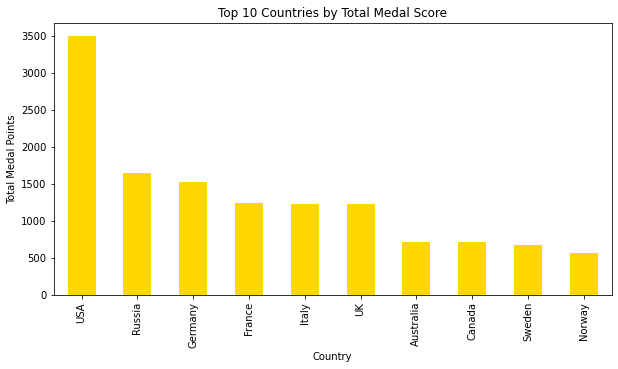

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df_merged.groupby('Region_Country')['Medal_Score'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(10,5), color='gold')
plt.title('Top 10 Countries by Total Medal Score')
plt.ylabel('Total Medal Points')
plt.xlabel('Country')
plt.show()

### 2-Distribution of Athletes by Age Group

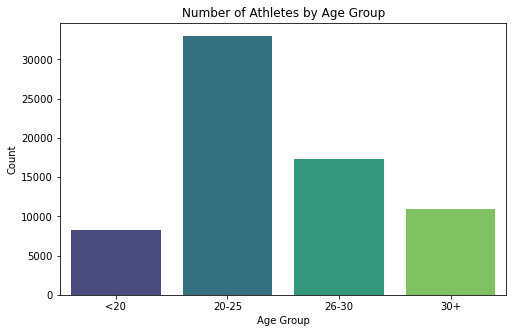

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_merged, x='Age_Group', palette='viridis', order=['<20','20-25','26-30','30+'])
plt.title('Number of Athletes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### 3- Top 10 Athletes by Total Medal Score'

Name
Nikolay Yefimovich Andrianov      34
Ole Einar Bjrndalen               33
Birgit Fischer-Schmidt            32
Raymond Clarence "Ray" Ewry       30
Vra Slavsk (-Odloilov)            29
Matthew Nicholas "Matt" Biondi    29
Viktor Ivanovych Chukarin         28
Marit Bjrgen                      25
Usain St. Leo Bolt                24
Allyson Michelle Felix            24
Name: Medal_Score, dtype: int64


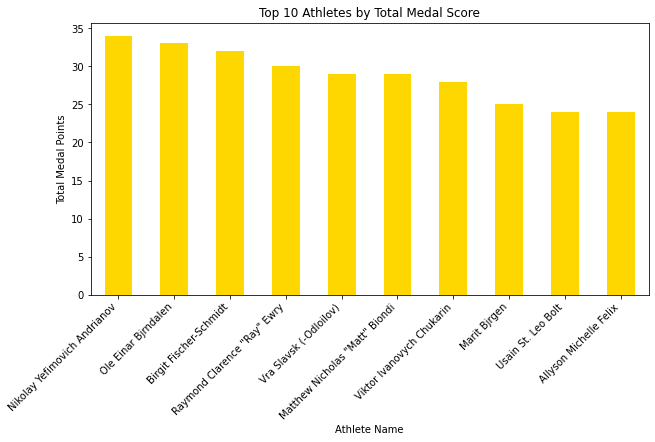

In [38]:
top_athletes = df_merged.groupby('Name')['Medal_Score'].sum().sort_values(ascending=False).head(10)
print(top_athletes)

plt.figure(figsize=(10,5))
top_athletes.plot(kind='bar', color='gold')
plt.title('Top 10 Athletes by Total Medal Score')
plt.ylabel('Total Medal Points')
plt.xlabel('Athlete Name')
plt.xticks(rotation=45, ha='right')
plt.show()

### 4- Top 10 Athletes by Number of Participations in all games

Name
Oksana Aleksandrovna Chusovitina         29
Ole Einar Bjrndalen                      27
Adrianus Egbert Willem "Arie" De Jong    27
Gustaf Eric Carlberg                     26
Ivan Aklec                               24
Henri Louis Borio                        24
Alberto Busnari                          24
Michel Boutard                           24
Ferdinand Dani                           24
Pasquale Carminucci                      24
dtype: int64


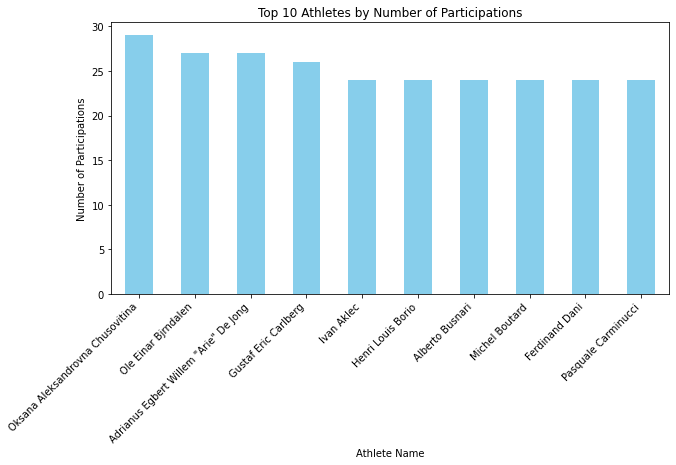

In [39]:
most_participated = df_merged.groupby('Name').size().sort_values(ascending=False).head(10)
print(most_participated)

plt.figure(figsize=(10,5))
most_participated.plot(kind='bar', color='skyblue')
plt.title('Top 10 Athletes by Number of Participations')
plt.ylabel('Number of Participations')
plt.xlabel('Athlete Name')
plt.xticks(rotation=45, ha='right')
plt.show()

### 5- Top 10 Athletes by Participation with Medal Count

                                       Total_Participations  Total_Medals
Name                                                                     
Piero D'Inzeo                                             8             8
Francisco Boza Dibos                                      8             2
Paul Bert Elvstrm                                         8            12
Raimondo D'Inzeo                                          8            10
Rajmond Debevec                                           8             5
Albert Mikhaylovich Demchenko                             7             6
Ludger Beerbaum                                           7            13
Oksana Aleksandrovna Chusovitina                          7             5
Yevgeniya Viktorovna Artamonova-Estes                     6             6
Norman Cudworth Cohn-Armitage                             6             1


<Figure size 1296x576 with 0 Axes>

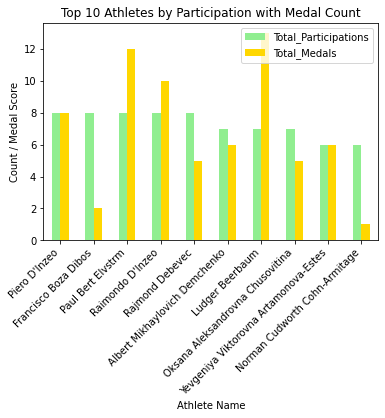

In [40]:
athlete_participation_summary = df_merged.groupby('Name').agg(
    Total_Participations=('Participation_Number', 'max'),  
    Total_Medals=('Medal_Score', 'sum')                     
).sort_values(by='Total_Participations', ascending=False).head(10)

print(athlete_participation_summary)


#plt.figure(figsize=(12,6))
plt.figure(figsize=(18,8))
athlete_participation_summary.plot(kind='bar', y=['Total_Participations','Total_Medals'],
                                   color=['lightgreen','gold'], rot=45)
plt.title('Top 10 Athletes by Participation with Medal Count')
plt.ylabel('Count / Medal Score')
plt.xlabel('Athlete Name')
plt.xticks(rotation=45, ha='right')
plt.show()

### 6-Number of Athletes by Sex

M    51531
F    18086
Name: Sex, dtype: int64


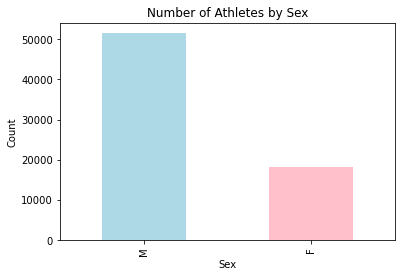

In [41]:
sex_counts = df_merged['Sex'].value_counts()
print(sex_counts)
sex_counts.plot(kind='bar', color=['lightblue', 'pink'], figsize=(6,4))
plt.title('Number of Athletes by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### 7-Total Medal Score by Sex

     Total_Participations  Total_Medals
Sex                                    
F                   18086          5266
M                   51531         14188


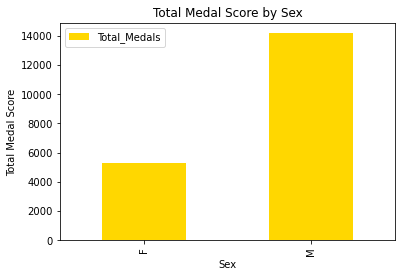

In [42]:
sex_summary = df_merged.groupby('Sex').agg(
    Total_Participations=('Participation_Number', 'count'),
    Total_Medals=('Medal_Score', 'sum')
)
print(sex_summary)
sex_summary.plot(kind='bar', y='Total_Medals', color=['gold'], figsize=(6,4))
plt.title('Total Medal Score by Sex')
plt.xlabel('Sex')
plt.ylabel('Total Medal Score')
plt.show()

### 8- Count of each Medal type per Sex

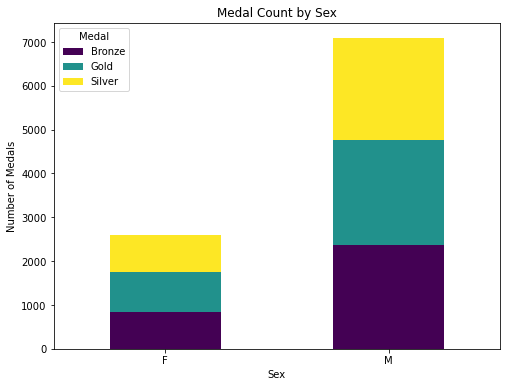

In [44]:
# Count of each Medal type per Sex
df_medals = df_merged[df_merged['Medal'] != 'No Medal']

# Pivot table 
medal_by_sex = df_medals.pivot_table(
    index='Sex',
    columns='Medal',
    values='Participation_ID',
    aggfunc='count',
    fill_value=0
)

medal_by_sex.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')
plt.title('Medal Count by Sex')
plt.ylabel('Number of Medals')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(title='Medal')
plt.show()

## ----------------------------------------------------------------------------------------------------------------------

# 5- Splitting the Dataset into Fact and Dimension Tables (Star Schema)

In [45]:
df_merged.columns

Index(['Participation_ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal',
       'Age_Group', 'Participation_Number', 'Is_Winter', 'Event_Type',
       'Medal_Score', 'Region_Country'],
      dtype='object')

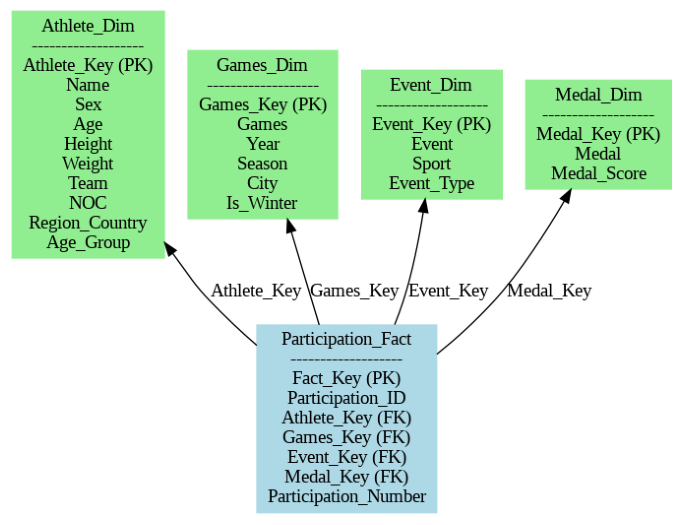

In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("olympics_star_schema.png")  
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off') 
plt.show()

## 1- Athlete Dimension (Athlete_Dim)

In [51]:
# Athlete Dimension
athlete_dim = df_merged[['Name', 'Sex', 'Age', 'Height', 'Weight',
                         'Team', 'NOC', 'Region_Country', 'Age_Group']].drop_duplicates().reset_index(drop=True)

# Add Surrogate Key
athlete_dim['Athlete_Key'] = athlete_dim.index + 1

# Rearrange columns
athlete_dim = athlete_dim[['Athlete_Key', 'Name', 'Sex', 'Age', 'Height', 'Weight',
                           'Team', 'NOC', 'Region_Country', 'Age_Group']]
athlete_dim

,Athlete_Key,Name,Sex,Age,Height,Weight,Team,NOC,Region_Country,Age_Group
0,1,A Dijiang,M,24.0,180.0,80.0,CHINA,CHN,China,20-25
1,2,A Lamusi,M,23.0,170.0,60.0,CHINA,CHN,China,20-25
2,3,A. Abdul Razzak,M,25.0,178.0,70.0,IRAQ,IRQ,Iraq,20-25
3,4,A. Albert,M,25.0,175.0,70.0,UNION DES SOCITS FRANAIS DE SPORTS ATHLETIQUES,FRA,France,20-25
4,5,A. Brun,F,25.0,175.0,70.0,FRANCE,FRA,France,20-25
...,...,...,...,...,...,...,...,...,...,...
49347,49348,Zygmunt Bogdziewicz,M,35.0,178.0,85.0,POLAND,POL,Poland,30+
49348,49349,Zygmunt Buhl,M,25.0,179.0,76.0,POLAND,POL,Poland,20-25
49349,49350,Zygmunt Chycha,M,21.0,170.0,66.0,POLAND,POL,Poland,20-25
49350,49351,Zygmunt Chycha,M,25.0,170.0,66.0,POLAND,POL,Poland,20-25


## 2- Games_Dim – Static Dimension(for every year)

In [55]:

#Extract distinct games
games_dim = df_merged[['Games', 'Year', 'Season', 'City', 'Is_Winter']].drop_duplicates()
games_dim = games_dim.sort_values('Year').reset_index(drop=True)
#Create Surrogate Key 
games_dim = games_dim.reset_index(drop=True)
games_dim['Games_Key'] = games_dim.index + 1

#Rearrange columns
games_dim = games_dim[['Games_Key', 'Games', 'Year', 'Season', 'City', 'Is_Winter']]

games_dim


,Games_Key,Games,Year,Season,City,Is_Winter
0,1,1896 Summer,1896,Summer,Athina,False
1,2,1900 Summer,1900,Summer,Paris,False
2,3,1904 Summer,1904,Summer,St. Louis,False
3,4,1906 Summer,1906,Summer,Athina,False
4,5,1908 Summer,1908,Summer,London,False
5,6,1912 Summer,1912,Summer,Stockholm,False
6,7,1920 Summer,1920,Summer,Antwerpen,False
7,8,1924 Winter,1924,Winter,Chamonix,True
8,9,1924 Summer,1924,Summer,Paris,False
9,10,1928 Summer,1928,Summer,Amsterdam,False


In [64]:
games_dim.columns

Index(['Games_Key', 'Games', 'Year', 'Season', 'City', 'Is_Winter'], dtype='object')

## 3- event_dim

In [66]:
# Extract distinct events
event_dim = df_merged[['Event', 'Sport', 'Event_Type']].drop_duplicates()

# Sort by Event name
event_dim = event_dim.sort_values('Event').reset_index(drop=True)

# Create Surrogate Key (Event_Key)
event_dim['Event_Key'] = event_dim.index + 1

# Rearrange columns
event_dim = event_dim[['Event_Key', 'Event', 'Sport', 'Event_Type']]

event_dim

,Event_Key,Event,Sport,Event_Type
0,1,Alpine Skiing Men'S Combined,Alpine Skiing,Individual
1,2,Alpine Skiing Men'S Downhill,Alpine Skiing,Individual
2,3,Alpine Skiing Men'S Giant Slalom,Alpine Skiing,Individual
3,4,Alpine Skiing Men'S Slalom,Alpine Skiing,Individual
4,5,Alpine Skiing Men'S Super G,Alpine Skiing,Individual
...,...,...,...,...
739,740,"Wrestling Women'S Flyweight, Freestyle",Wrestling,Individual
740,741,"Wrestling Women'S Heavyweight, Freestyle",Wrestling,Individual
741,742,"Wrestling Women'S Light-Heavyweight, Freestyle",Wrestling,Individual
742,743,"Wrestling Women'S Lightweight, Freestyle",Wrestling,Individual


## 4- medal_dim

In [49]:
medal_dim = df_merged[['Medal', 'Medal_Score']].drop_duplicates().reset_index(drop=True)

# Surrogate Key
medal_dim['Medal_Key'] = medal_dim.index + 1

medal_dim = medal_dim[['Medal_Key', 'Medal', 'Medal_Score']]

medal_dim



,Medal_Key,Medal,Medal_Score
0,1,No Medal,0
1,2,Gold,3
2,3,Bronze,1
3,4,Silver,2


### 5- Fact Table

In [62]:
# Merge with Athlete_Dim
fact_table = df_merged.merge(athlete_dim, on=['Name', 'Sex', 'Age', 'Height', 'Weight',
                                              'Team', 'NOC', 'Region_Country', 'Age_Group'], how='left')
# Merge with Games_Dim
fact_table = fact_table.merge(games_dim, on=['Games', 'Year', 'Season', 'City', 'Is_Winter'], how='left')
# Merge with Event_Dim
fact_table = fact_table.merge(event_dim, on=['Event', 'Sport', 'Event_Type'], how='left')
# Merge with Medal_Dim
fact_table = fact_table.merge(medal_dim, on=['Medal', 'Medal_Score'], how='left')
# Keep only required fact columns
participation_fact = fact_table[['Participation_ID', 'Athlete_Key', 'Games_Key',
                                 'Event_Key', 'Medal_Key', 'Participation_Number']].reset_index(drop=True)
# Add Surrogate Key for Fact table
participation_fact['Fact_Key'] = participation_fact.index + 1
# Rearrange
participation_fact = participation_fact[['Fact_Key', 'Participation_ID', 'Athlete_Key',
                                         'Games_Key', 'Event_Key', 'Medal_Key', 'Participation_Number']]
participation_fact

,Fact_Key,Participation_ID,Athlete_Key,Games_Key,Event_Key,Medal_Key,Participation_Number
0,1,1,1,40,150,1,1
1,2,2,2,50,383,1,1
2,3,300,3,24,105,1,1
3,4,300,3,24,116,1,1
4,5,2316,4,2,446,2,1
...,...,...,...,...,...,...,...
69612,69613,12749,49348,31,555,1,2
69613,69614,16228,49349,19,81,1,1
69614,69615,21476,49350,17,183,1,1
69615,69616,21476,49351,19,183,2,2


## Save all files

In [69]:
athlete_dim.to_csv("athlete_dim.csv", index=False)
games_dim.to_csv("games_dim.csv", index=False)
event_dim.to_csv("event_dim.csv", index=False)
medal_dim.to_csv("medal_dim.csv", index=False)
participation_fact.to_csv("participation_fact.csv", index=False)

print("All Dimension and Fact tables are saved as CSV files.")

All Dimension and Fact tables are saved as CSV files.
